In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "drive/MyDrive/CNN Stock Prediction"

/content/drive/.shortcut-targets-by-id/11M8JhuGjMeTkxBAoI1sL3lLEa69ylHrV/CNN Stock Prediction


#Load in X_train, X_label, y_train, y_label

In [ ]:
import pandas as pd
stock = 'IBM'

train_features_path = f"data/split/{stock}_train_feature_set.csv"
train_ft_df = pd.read_csv(train_features_path)

train_labels_path = f"data/split/{stock}_train_label_set.csv"
train_labels_df = pd.read_csv(train_labels_path)

test_features_path = f"data/split/{stock}_test_feature_set.csv"
test_ft_df = pd.read_csv(test_features_path)

test_labels_path = f"data/split/{stock}_test_label_set.csv"
test_labels_df = pd.read_csv(test_labels_path)

dataframes = [train_ft_df, train_labels_df, test_ft_df, test_labels_df]

cleaned_dfs = []
for i in range(len(dataframes)):
  df = dataframes[i]
  cleaned_df = df.drop(['Unnamed: 0'], axis=1)
  cleaned_df = cleaned_df.dropna()

  cleaned_dfs.append(cleaned_df)

X_train_all = cleaned_dfs[0]
y_train_set = cleaned_dfs[1]
X_test_all = cleaned_dfs[2]
y_test = cleaned_dfs[3]


Check for NAN Values

In [ ]:
X_train_all.isnull().values.any()

False

In [ ]:
y_train_set.isnull().values.any()

False

DataFrame Sizes Before Choosing Best 225 Features

In [ ]:
print(f"X_train_all shape: {X_train_all.shape}")
print(f"y_train_set labels shape: {y_train_set.shape}")
print(f"X_test_all shape: {X_test_all.shape}")
print(f"y_test labels shape: {y_test.shape}\n")

X_train_all shape: (3115, 420)
y_train_set labels shape: (3115, 1)
X_test_all shape: (779, 420)
y_test labels shape: (779, 1)



In [ ]:
# count train labels
y_train_set.Label.value_counts()

Label
0    2719
2     201
1     195
Name: count, dtype: int64

In [ ]:
# count test labels
y_test.Label.value_counts()

Label
0    680
2     50
1     49
Name: count, dtype: int64

#Retrieve Data with Best Features

In [ ]:
data_path = f"data/features/{stock}_common_selected_features.csv"
df = pd.read_csv(data_path)

df = df.drop(['Unnamed: 0'], axis=1)

df.head() #(225, 1)

,0
0,WILLR_ta_10
1,UI_ta_13
2,ADX_ta_10
3,MFI_ta_16
4,MFI_ta_20


In [ ]:
# transpose dataframe
max_accuracy_features = df.T

headers = max_accuracy_features.iloc[0]
features = pd.DataFrame(max_accuracy_features.values[1:], columns=headers) # best feature columns (0, 225) shape

features.head()

0,WILLR_ta_10,UI_ta_13,ADX_ta_10,MFI_ta_16,MFI_ta_20,WILLR_ta_13,BBW_ta_8,CMF_ta_12,WILLR_ta_15,WILLR_ta_19,...,WILLR_ta_11,BBW_ta_7,WILLR_ta_9,UI_ta_6,UI_ta_14,CMF_ta_11,DPO_ta_10,MACD_ta_16,TSI_ta_16,ROC_ta_11


Best 225 Features in the Train Set

In [ ]:
common_cols=list(set.intersection(set(X_train_all), set(features)))
X_train_selected_features = X_train_all[common_cols]

# rearrange to keep the original order of feature columns
X_train_set = X_train_selected_features[list(features.columns)]

print("Shape of Train Features:", X_train_set.shape)

Shape of Train Features: (3115, 225)


Best 225 Features in the Test Set

In [ ]:
common_cols=list(set.intersection(set(X_test_all), set(features)))
X_test_selected_features = X_test_all[common_cols]

# rearrange to keep the original order of feature columns
X_test = X_test_selected_features[list(features.columns)]

print("Shape of Test Features:", X_test.shape)

Shape of Test Features: (779, 225)


In [ ]:
print(f"y_train_set labels shape: {y_train_set.shape}")
print(f"y_test labels shape: {y_test.shape}")

y_train_set labels shape: (3115, 1)
y_test labels shape: (779, 1)


In [ ]:
X_train_set.head()

,WILLR_ta_10,UI_ta_13,ADX_ta_10,MFI_ta_16,MFI_ta_20,WILLR_ta_13,BBW_ta_8,CMF_ta_12,WILLR_ta_15,WILLR_ta_19,...,WILLR_ta_11,BBW_ta_7,WILLR_ta_9,UI_ta_6,UI_ta_14,CMF_ta_11,DPO_ta_10,MACD_ta_16,TSI_ta_16,ROC_ta_11
0,-7.553660,1.566633,24.480174,52.542374,52.468814,-6.849657,2.934094,0.965699,-6.849657,-6.849657,...,-7.308307,2.610931,-7.553660,1.414918,1.632359,0.963404,2.784,0.106596,0.577117,3.214339
1,-6.425005,1.116005,50.620817,62.371872,60.867402,-6.318036,4.460022,0.972413,-6.299883,-6.299883,...,-6.318036,3.681633,-6.502636,1.232719,1.091118,0.973857,-1.310,3.396224,21.961686,2.166482
2,-13.188532,5.679033,19.458767,44.227347,32.249261,-12.533025,4.200921,0.930723,-11.575416,-17.700497,...,-12.603786,4.487104,-13.188532,1.712784,6.681156,0.925735,-1.943,-1.721711,-8.773249,2.040498
3,-0.000000,1.120743,35.504984,75.506222,70.760227,-0.000000,8.223206,0.981867,-0.000000,-0.000000,...,-0.000000,7.903449,-0.000000,0.000000,1.635767,0.982246,-6.461,1.741445,13.494593,6.685954
4,-4.238645,0.803312,35.954272,65.701644,59.348274,-4.238645,1.550652,0.968858,-4.223342,-4.080143,...,-4.238645,1.606845,-4.348578,0.931803,0.774090,0.970415,3.054,1.957827,9.371423,0.797809


In [ ]:
y_train_set.head()

,Label
0,0
1,0
2,0
3,0
4,0


In [ ]:
import numpy as np
unique, counts = np.unique(y_test, return_counts=True)
print("y_test Class Distribution: ")
print(np.asarray((unique, counts)).T)

y_test Class Distribution: 
[[  0 680]
 [  1  49]
 [  2  50]]


#Train and Validation Split

In [ ]:
from sklearn.model_selection import train_test_split

# split train into train and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train_set, y_train_set, train_size=0.7,
                                                    test_size=0.3, random_state=2, shuffle=True,
                                                    stratify=y_train_set)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

X_train shape: (2180, 225)
y_train shape: (2180, 1)
X_val shape: (935, 225)
y_val shape: (935, 1)


In [ ]:
import numpy as np
unique, counts = np.unique(y_val, return_counts=True)
print("y_val Class Distribution: ")
print(np.asarray((unique, counts)).T)

y_val Class Distribution: 
[[  0 816]
 [  1  59]
 [  2  60]]


In [ ]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
print("y_train Class Distribution: ")
print(np.asarray((unique, counts)).T)

y_train Class Distribution: 
[[   0 1903]
 [   1  136]
 [   2  141]]


#Balance Classes on Train Set

In [ ]:
!pip install imbalanced-learn

Train Set Label Distribution:
Class=0, n=1903 (87.294%)
Class=2, n=141 (6.468%)
Class=1, n=136 (6.239%)




/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


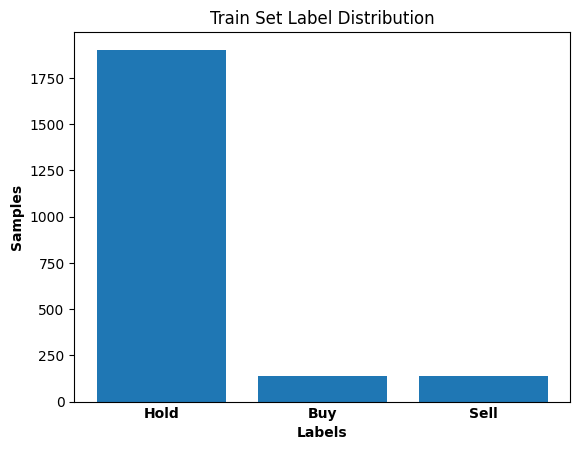

In [ ]:
import imblearn
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import matplotlib.pyplot as plt

# encode labels for each class
def sampleDistribution(y):
  y = LabelEncoder().fit_transform(y)
  counter = Counter(y)

  for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
  print("\n")

  bars = ('Hold', 'Buy', 'Sell')
  y_pos = np.arange(len(bars))

  plt.bar(counter.keys(), counter.values())
  plt.tick_params(axis='x', colors='red', direction='out', length=0, width=3)
  plt.xticks(np.arange(0, 3, 1))
  plt.xticks(y_pos, bars, color='black', rotation=0, fontweight='bold', fontsize='10', horizontalalignment='center')
  plt.xlabel('Labels', fontweight='bold')
  plt.ylabel('Samples', fontweight='bold')
  plt.title('Train Set Label Distribution')


print("Train Set Label Distribution:")
sampleDistribution(y_train)

Oversampling the Minority Class

In [ ]:
# # from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import TomekLinks
# from imblearn.over_sampling import RandomOverSampler

# # oversample = RandomOverSampler(sampling_strategy="not majority")
# # # resample the dataset
# # X_over, y_over = oversample.fit_resample(X_train, y_train)

# sampleDistribution(y_train)

# under = TomekLinks()

# X_train, y_train = under.fit_resample(X_train, y_train)
# sampleDistribution(y_train)

# X_train.shape

In [ ]:
# from imblearn.over_sampling import SMOTE

# sampleDistribution(y_train)

# # define oversampling strategy
# over = SMOTE()

# X_train, y_train = over.fit_resample(X_train, y_train)
# sampleDistribution(y_train)


Undersampling the Majority Class

In [ ]:
# from imblearn.under_sampling import RandomUnderSampler
# # define undersample strategy
# undersample = RandomUnderSampler(sampling_strategy='majority')

# # fit and apply the transform
# X_train_bal, y_train_bal = undersample.fit_resample(X_train, y_train)

# sampleDistribution(y_train_bal)

# X_train = pd.DataFrame(X_train_bal, columns = X.columns) # feature columns
# y_train = pd.DataFrame(y_train_bal, columns = y.columns) # undersampled label columns

# X_train.shape

Combined Oversampling and Undersampling

In [ ]:
# # from imblearn.under_sampling import RandomUnderSampler
# # from imblearn.over_sampling import RandomOverSampler

# from imblearn.combine import SMOTEENN, SMOTETomek

# # resample all but the majority class
# smote_tomek = SMOTETomek(sampling_strategy = 'not majority')

# # resample the dataset
# X_train, y_train = smote_tomek.fit_resample(X_train, y_train)

# sampleDistribution(y_train)

# # X_train = pd.DataFrame(X_train_bal, columns = X.columns) # undersample/oversampled feature columns
# # y_train = pd.DataFrame(y_train_bal, columns = y.columns) # undersample/oversampled label columns

# X_train.shape
# #y_train.shape

Undersampling then Oversampling

In [ ]:
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler

# sampleDistribution(y_train)
# # define undersampling strategy
# under = RandomUnderSampler(sampling_strategy={0:1250})

# X_train, y_train = under.fit_resample(X_train, y_train)
# sampleDistribution(y_train)
# # define oversampling strategy
# over = RandomOverSampler(sampling_strategy = 'not majority')

# X_train, y_train = over.fit_resample(X_train, y_train)

# sampleDistribution(y_train)

Oversampling Using Smote Then Undersampling Using Tomek

In [ ]:
# from imblearn.under_sampling import TomekLinks
# # from imblearn.over_sampling import RandomOverSampler
# from imblearn.over_sampling import SMOTE

# sampleDistribution(y_train)

# # define oversampling strategy
# over = SMOTE()

# X_train, y_train = over.fit_resample(X_train, y_train)
# sampleDistribution(y_train)


# # define undersampling strategy
# under = TomekLinks()

# X_train, y_train = under.fit_resample(X_train, y_train)
# sampleDistribution(y_train)


###Calculate Sample Weights

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# y_integers = np.argmax(y_train, axis=1) # compute_class_weight needs int labels
# class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_integers), y=y_integers)
# d_class_weights = dict(enumerate(class_weights))

y_int = y_train.Label.values
y_integers = y_int.astype(int)  # compute_class_weight needs int labels
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_integers), y=y_integers)
sample_weights = y_integers.copy().astype(float)
for i in np.unique(y_integers):
  sample_weights[sample_weights == i] = class_weights[i]

rand_idx = np.random.randint(0, 100, 20)
print(y_train.iloc[rand_idx])
print(sample_weights[rand_idx])

      Label
185       0
2534      0
2135      0
1325      0
1129      0
2506      0
3005      0
77        0
101       0
1680      1
113       0
1487      0
940       0
221       2
913       0
88        0
2853      2
1652      0
284       1
2329      0
[0.38185321 0.38185321 0.38185321 0.38185321 0.38185321 0.38185321
 0.38185321 0.38185321 0.38185321 5.34313725 0.38185321 0.38185321
 0.38185321 5.1536643  0.38185321 0.38185321 5.1536643  0.38185321
 5.34313725 0.38185321]


# Setup Test Input Images (Normalizing + Encoding)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# min max scalar
MM_SCALER = MinMaxScaler(feature_range=(-1, 1))

# One Hot Encode Labels
"""
0 -> [1, 0, 0]
1 -> [0, 1, 0]
2 -> [0, 0, 1]
"""

'\n0 -> [1, 0, 0]\n1 -> [0, 1, 0]\n2 -> [0, 0, 1]\n'

###Normalize Data

In [ ]:
X_train = MM_SCALER.fit_transform(X_train)
X_val = MM_SCALER.transform(X_val)
X_test = MM_SCALER.transform(X_test)

###Reshape Data into 15x15 Images

In [ ]:
X_train_images = X_train.reshape(X_train.shape[0], 15, 15)
X_val_images = X_val.reshape(X_val.shape[0], 15, 15)
X_test_images = X_test.reshape(X_test.shape[0], 15, 15)

print(f"X_train Images shape: {X_train_images.shape}")
print(f"X_val Images shape: {X_val_images.shape}")
print(f"X_test Images shape: {X_test_images.shape}")

X_train Images shape: (2180, 15, 15)
X_val Images shape: (935, 15, 15)
X_test Images shape: (779, 15, 15)


###Encode Labels

In [ ]:
OHE = OneHotEncoder(sparse=False, categories='auto')

y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

y_train = OHE.fit_transform(y_train.reshape(-1, 1)) # Reshapes to a column vector
y_val = OHE.transform(y_val.reshape(-1, 1))
y_test = OHE.transform(y_test.reshape(-1, 1))

y_train.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(2180, 3)

In [ ]:
print(f"X_train images shape: {X_train_images.shape}")
print(f"y_train labels shape: {y_train.shape}\n")

print(f"X_val images shape: {X_val_images.shape}")
print(f"y_val labels shape: {y_val.shape}\n")

print(f"X_test images shape: {X_test_images.shape}")
print(f"y_test labels shape: {y_test.shape}\n")

X_train images shape: (2180, 15, 15)
y_train labels shape: (2180, 3)

X_val images shape: (935, 15, 15)
y_val labels shape: (935, 3)

X_test images shape: (779, 15, 15)
y_test labels shape: (779, 3)



#CNN

###CNN Implementation

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

!pip install h5py

In [ ]:
params = {
    "input_w": 15,
    "input_h": 15,
    "input_c": 3,
    "num_classes": 3,
    "batch_size": 1024,
    "epochs": 2000
    }

In [ ]:
from tensorflow.keras import regularizers

# CNN model
model = Sequential()
# Conv2D
model.add(Conv2D(filters = 20,
                 kernel_size = 2,
                 strides = 1,
                 padding = 'valid',
                 activation='relu',
                 use_bias = True,
                 kernel_regularizer=regularizers.l2(0.0),
                 kernel_initializer='glorot_uniform',
                 input_shape=(params["input_w"],
                              params["input_h"],
                              params["input_c"])
                  ))

# Dropout
model.add(Dropout(0.22))

# Conv2D
model.add(Conv2D(filters = 40,
                 kernel_size = 2,
                 strides = 2,
                 padding = 'valid',
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.0),
                 kernel_initializer='glorot_uniform',
                 ))

# Dropout
model.add(Dropout(0.05))

# Flatten
model.add(Flatten())

# Dense
model.add(Dense(100, activation='relu'))

# Dropout
model.add(Dropout(0.22))

# Dense
model.add(Dense(3, activation='softmax'))

# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'mae', 'mse'])

###Model Checkpoint Callbacks

In [ ]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger, Callback

best_model_path = "models/stock_cnn_best_model_kbestfeatures_new_arch.h5"
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,
                   patience=100, min_delta=0.0001) # Stops the training early when validation loss stops improving, prevent overfitting

rlp = ReduceLROnPlateau(monitor='val_loss', factor=0.02, patience=20, verbose=1, mode='min',
                        min_delta=0.001, cooldown=1, min_lr=0.0001) # Adjusts Learning Rate on validation loss

mcp = ModelCheckpoint(best_model_path, monitor='val_loss', verbose=1,
                      save_best_only=True, save_weights_only=False, mode='min', save_freq="epoch")  # val_f1_metric

###Train CNN

In [ ]:
# reshape images into 3 channels
X_train_images = np.stack((X_train_images,)*3, axis=-1)
X_val_images = np.stack((X_val_images,)*3, axis=-1)
X_test_images = np.stack((X_test_images,)*3, axis=-1)

In [ ]:
print(f"X_train Images shape: {X_train_images.shape}")
print(f"y_train labels shape: {y_train.shape}\n")

print(f"X_val Images shape: {X_val_images.shape}")
print(f"y_val labels shape: {y_val.shape}\n")

print(f"X_test Images shape: {X_test_images.shape}")
print(f"y_test labels shape: {y_test.shape}\n")

X_train Images shape: (2180, 15, 15, 3)
y_train labels shape: (2180, 3)

X_val Images shape: (935, 15, 15, 3)
y_val labels shape: (935, 3)

X_test Images shape: (779, 15, 15, 3)
y_test labels shape: (779, 3)



In [ ]:
%%time
hist = model.fit(X_train_images, y_train,
          batch_size=params["batch_size"],
          epochs=params["epochs"],
          callbacks=[mcp, rlp],
          validation_data = (X_val_images, y_val),
          sample_weight = sample_weights,
          verbose=1)

Epoch 1/2000
3/3 [==============================] - ETA: 0s - loss: 1.0600 - accuracy: 0.2156 - mae: 0.4481 - mse: 0.2317 
Epoch 1: val_loss improved from inf to 0.89082, saving model to models/stock_cnn_best_model_kbestfeatures_new_arch.h5
3/3 [==============================] - 15s 1s/step - loss: 1.0600 - accuracy: 0.2156 - mae: 0.4481 - mse: 0.2317 - val_loss: 0.8908 - val_accuracy: 0.5968 - val_mae: 0.3902 - val_mse: 0.1848 - lr: 0.0010
Epoch 2/2000
1/3 [=========>....................] - ETA: 0s - loss: 1.0071 - accuracy: 0.6094 - mae: 0.3869 - mse: 0.1823

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Streaming output truncated to the last 5000 lines.
Epoch 751: val_loss did not improve from 0.70505
3/3 [==============================] - 0s 36ms/step - loss: 0.3645 - accuracy: 0.6651 - mae: 0.2215 - mse: 0.1431 - val_loss: 0.7709 - val_accuracy: 0.5754 - val_mae: 0.2656 - val_mse: 0.1799 - lr: 1.0000e-04
Epoch 752/2000
1/3 [=========>....................] - ETA: 0s - loss: 0.3869 - accuracy: 0.6357 - mae: 0.2356 - mse: 0.1559
Epoch 752: val_loss did not improve from 0.70505
3/3 [==============================] - 0s 40ms/step - loss: 0.3699 - accuracy: 0.6528 - mae: 0.2251 - mse: 0.1457 - val_loss: 0.7746 - val_accuracy: 0.5701 - val_mae: 0.2668 - val_mse: 0.1811 - lr: 1.0000e-04
Epoch 753/2000
1/3 [=========>....................] - ETA: 0s - loss: 0.3422 - accuracy: 0.6768 - mae: 0.2190 - mse: 0.1394
Epoch 753: val_loss did not improve from 0.70505
3/3 [==============================] - 0s 41ms/step - loss: 0.3542 - accuracy: 0.6651 - mae: 0.2224 - mse: 0.1431 - val_loss: 0.7776 - v

###Model Evaluation

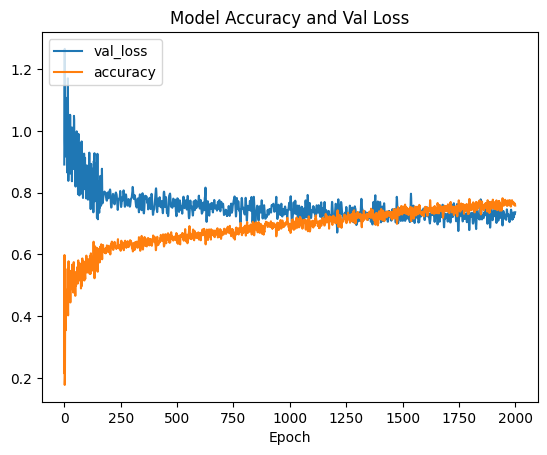

dict_keys(['loss', 'accuracy', 'mae', 'mse', 'val_loss', 'val_accuracy', 'val_mae', 'val_mse', 'lr'])

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure()

plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])

plt.title(f'Model Accuracy and Val Loss')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'accuracy'], loc='upper left')

plt.show()

# print("Model Accuracy:", hist.history['accuracy'][9])
# print("Model Validation Loss:", hist.history['val_loss'][9])

hist.history.keys()

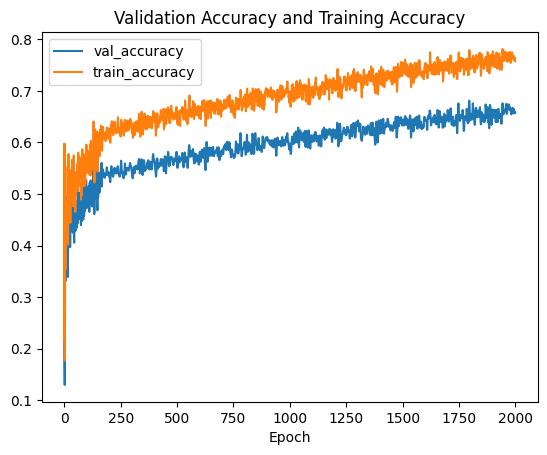

In [ ]:
plt.figure()

plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['accuracy'])

plt.title(f'Validation Accuracy and Training Accuracy')
plt.xlabel('Epoch')
plt.legend(['val_accuracy', 'train_accuracy'], loc='upper left')

plt.show()

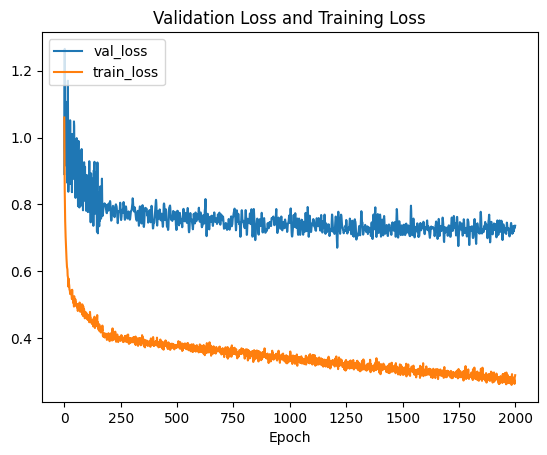

In [ ]:
plt.figure()

plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])

plt.title(f'Validation Loss and Training Loss')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'train_loss'], loc='upper left')

plt.show()

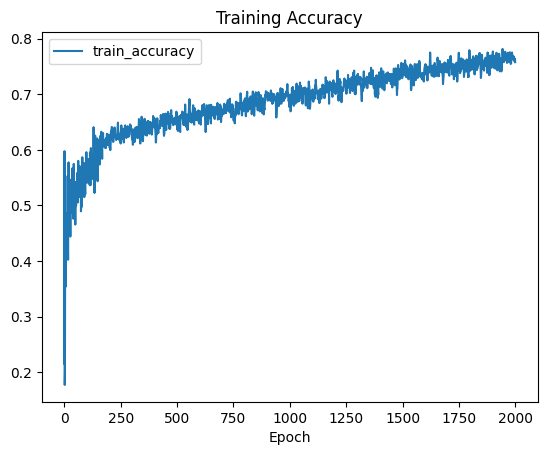

In [ ]:
plt.figure()

plt.plot(hist.history['accuracy'])

plt.title(f'Training Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_accuracy'], loc='upper left')

plt.show()

###Test CNN

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# convert one-hot encoded labels to integer labels
y_true = np.argmax(y_test, axis=1)

# get model predictions
y_predict = model.predict(X_test_images)

# convert predictions to integers
y_predict = np.argmax(y_predict, axis=1)

#rounded_labels = np.argmax(y_test, axis=1) # convert label to single-digit

cm = confusion_matrix(y_true, y_predict)
print(cm)
print(classification_report(y_true, y_predict))

print(len(y_predict))

25/25 [==============================] - 0s 8ms/step
[[452 133  95]
 [ 15  34   0]
 [ 22   0  28]]
              precision    recall  f1-score   support

           0       0.92      0.66      0.77       680
           1       0.20      0.69      0.31        49
           2       0.23      0.56      0.32        50

    accuracy                           0.66       779
   macro avg       0.45      0.64      0.47       779
weighted avg       0.83      0.66      0.72       779

779


###Load Model

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras import backend as K

# model = load_model('models/stock_cnn_best_model_kbestfeatures_new_arch.h5')
model = load_model('models/stock_cnn_best_model_kbestfeatures_new_arch.h5')
# print summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 20)        260       
                                                                 
 dropout (Dropout)           (None, 14, 14, 20)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 40)          3240      
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 40)          0         
                                                                 
 flatten (Flatten)           (None, 1960)              0         
                                                                 
 dense (Dense)               (None, 100)               196100    
                                                                 
 dropout_2 (Dropout)         (None, 100)               0

###Confusion Matrix Visualization

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# convert one-hot encoded labels to integer labels
y_true = np.argmax(y_test, axis=1)

# get model predictions
y_predict = model.predict(X_test_images)

# convert predictions to integers
y_predict = np.argmax(y_predict, axis=1)

#rounded_labels = np.argmax(y_test, axis=1) # convert label to single-digit

cm = confusion_matrix(y_true, y_predict)
print(cm)
print(classification_report(y_true, y_predict))

print(len(y_predict))

25/25 [==============================] - 0s 3ms/step
[[443 127 110]
 [ 14  35   0]
 [ 18   0  32]]
              precision    recall  f1-score   support

           0       0.93      0.65      0.77       680
           1       0.22      0.71      0.33        49
           2       0.23      0.64      0.33        50

    accuracy                           0.65       779
   macro avg       0.46      0.67      0.48       779
weighted avg       0.84      0.65      0.71       779

779


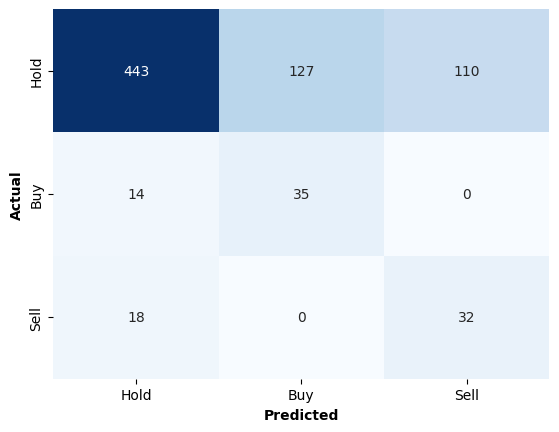

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

categories = ['Hold', 'Buy', 'Sell']

# group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
labels = [f"{v1}" for v1 in group_counts]
labels = np.asarray(labels).reshape(3,3)
display = sns.heatmap(cm, annot=labels, cmap='Blues', fmt='', xticklabels=categories, yticklabels=categories, cbar=False)

display.plot()
plt.xlabel('Predicted', fontweight='bold')
plt.tick_params(labeltop=False, labelbottom=True)
plt.ylabel('Actual', fontweight='bold')
plt.show()